In [1]:
# Google Colab
# Sets project folder as working directory ('.../My Drive/Colab Notebooks/cifar10_classification_autoencoder)
import sys
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab \Notebooks/cifar10_classification_autoencoder
!pwd
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/cifar10_classification_autoencoder/cifar10_modules/')
!pip install matplotlib==3.1.0

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/cifar10_classification_autoencoder
/content/gdrive/My Drive/Colab Notebooks/cifar10_classification_autoencoder


In [2]:
# Developed modules
from dataset import *
from modelling5 import *

Using TensorFlow backend.


In [0]:
# Suppress tensorflow warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [0]:
set_random_seeds(42)

In [0]:
autoencoder_config= {'activity_regularizer': False,
                    'activity_regularizer_type': 'l1',
                    'activity_regularizer_value': 0.001,
                    'batch_norm': False, 
                    'batch_size': 32,
                    'callbacks': False,
                    'conv_blocks': 2,
                    'dropout': False,
                    'dropout_value': 0.2,
                    'early_stopping': False,
                    'early_stopping_delta': 0.1,
                    'early_stopping_patience': 10,
                    'epochs': 100,
                    'gaussian_noise_input': False,
                    'gaussian_noise_hidden': False,
                    'gaussian_noise_stddev': 0.1,
                    'image_shape': [32, 32, 3],
                    'init_num_filters': 32,
                    'kernel_regularizer': False,
                    'kernel_regularizer_type': 'l2',
                    'kernel_regularizer_value': 0.001,
                    'layers_per_block': 2,
                    'loss': 'mean_squared_error',
                    'lr': 0.001,
                    'optimizer': 'adam'}

In [0]:
save_config(autoencoder_config, 'autoencoder_config_base.json')

In [7]:
x_train, x_val, x_test, y_train, y_val, y_test, class_names= load_and_norm(0.22)

Normalized by the maximum value of training set
Normalized by the maximum value of training set
Normalized by the maximum value of training set
**Training data**
Number of samples: 33150
airplane : 3910
automobile : 3891
bird : 1944
cat : 3874
deer : 1981
dog : 3913
frog : 3894
horse : 3889
ship : 3905
truck : 1949

**Validation data**
Number of samples: 9350
airplane : 1090
automobile : 1109
bird : 556
cat : 1126
deer : 519
dog : 1087
frog : 1106
horse : 1111
ship : 1095
truck : 551

**Test data**
Number of samples: 10000
airplane : 1000
automobile : 1000
bird : 1000
cat : 1000
deer : 1000
dog : 1000
frog : 1000
horse : 1000
ship : 1000
truck : 1000






Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          

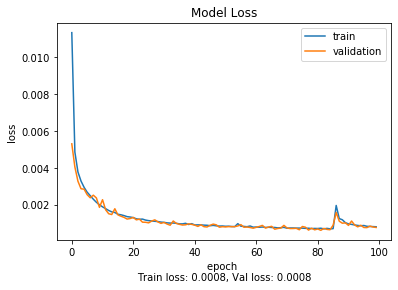

In [7]:
#1
autoencoder_config= load_config('autoencoder_config_base.json')
autoencoder_config['conv_blocks'] = 3
autoencoder_config['batch_size'] = 32
autoencoder_config['epochs'] = 100
autoencoder_config['optimizer'] = 'adam'
autoencoder_config['lr'] = 0.001
autoencoder_filename= 'autoencoder_5m_adam_100epochs_3blocks'
save_config(autoencoder_config,'autoencoder_config_5m_adam_100epochs_3blocks.json')
encoder_filename= 'encoder_5m_adam_100epochs_4blocks'
autoencoder= train_autoencoder(x_train, x_val, autoencoder_config, autoencoder_filename,encoder_filename)

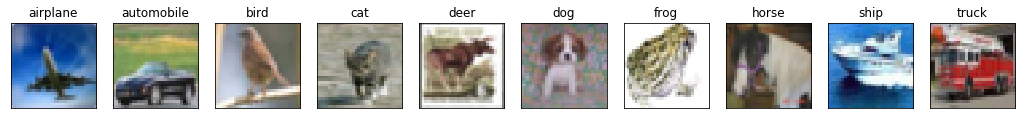

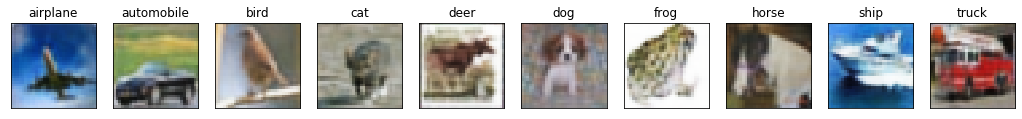

In [8]:
autoencoder=load_saved_model(autoencoder_filename)
x_pred= autoencoder.predict(x_val)
image_list= random_images(y_val, class_names)
show_image_list(x_val,y_val,class_names,image_list)
show_image_list(x_pred,y_val,class_names,image_list)

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_49 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_50 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0   

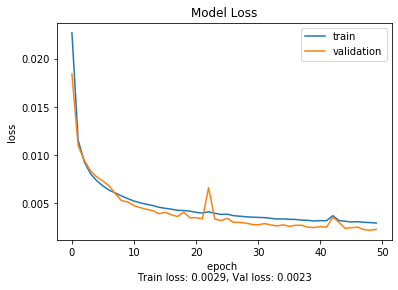

In [12]:
#2
autoencoder_config= load_config('autoencoder_config_base.json')
autoencoder_config['conv_blocks'] = 3
autoencoder_config['batch_size'] = 512
autoencoder_config['epochs'] = 50
autoencoder_config['optimizer'] = 'adam'
autoencoder_config['lr'] = 0.001
autoencoder_config['batch_norm'] = True
autoencoder_config['dropout'] = True
autoencoder_config['dropout_value'] = 0.2
autoencoder_filename= 'autoencoder_5m_adam_50epochs_3blocks_02dropout'
save_config(autoencoder_config,'autoencoder_config_5m_adam_50epochs_3blocks_02dropout.json')
encoder_filename= 'encoder_5m_adam_50epochs_3blocks_02dropout'
autoencoder= train_autoencoder(x_train, x_val, autoencoder_config, autoencoder_filename,encoder_filename)

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_73 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_74 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0   

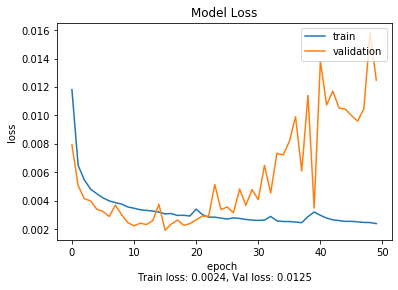

In [15]:
#3
autoencoder_config= load_config('autoencoder_config_base.json')
autoencoder_config['conv_blocks'] = 3
autoencoder_config['batch_size'] = 64
autoencoder_config['epochs'] = 50
autoencoder_config['optimizer'] = 'adam'
autoencoder_config['lr'] = 0.001
autoencoder_config['batch_norm'] = True
autoencoder_config['dropout'] = True
autoencoder_config['dropout_value'] = 0.2
autoencoder_filename= 'autoencoder_5m_64batch_adam_50epochs_3blocks_02dropout'
save_config(autoencoder_config,'autoencoder_config_5m_64batch_adam_50epochs_3blocks_02dropout.json')
encoder_filename= 'encoder_5m_64batch_adam_50epochs_3blocks_02dropout'
autoencoder= train_autoencoder(x_train, x_val, autoencoder_config, autoencoder_filename,encoder_filename)

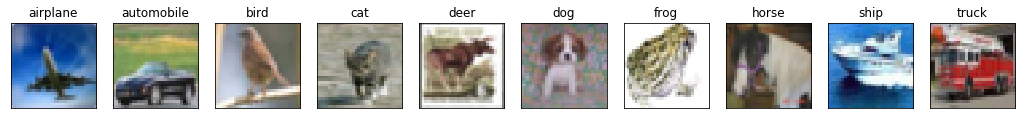

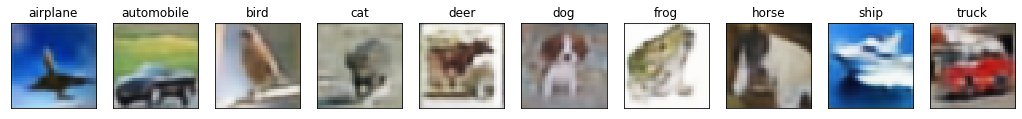

In [13]:
autoencoder=load_saved_model(autoencoder_filename)
x_pred= autoencoder.predict(x_val)
image_list= random_images(y_val, class_names)
show_image_list(x_val,y_val,class_names,image_list)
show_image_list(x_pred,y_val,class_names,image_list)